# Summary of Findings

### Introduction
The questions me and my partner are investigating are: what are the most prevalent organizations, advertisers, and ballot candidates in the data, and how does the spend differ within single gendered ads versus both gender ads?

### Cleaning and EDA
**Basic Cleaning**
> We first imported the 2018 and 2019 datasets from our raw csv files, and read them into dataframes. We then concatenated the two dataframes together into one master dataframe with all of the information from 2018 and 2019. We cleaned the StartDate and EndDate columns by converting them into DateTime timestamp objects to make it more accessible and malleable.

**EDA for "What are the most prevalent organizations, advertisers, and ballot candidates in the data?"**
> Then we performed EDA on both of our topics. For the topic about organizer prevalence and spending, we first checked the missingness of the spending values and organizer names for each ad and found that there were none. We wanted to then explore the companies with the most ads bought, so we took the master data and took the value counts of the OrganizationName column which gave us the number of ads each company bought. We then plotted the frequency of each ad volume on a histogram in <span style="color:Red">**Plot #1**</span>. In this we found that most companies buy less than 50 ads total, and very few exceed 50 ads bought. We also explored the average amount of money spent on an ad in relation to how many ads were bought. We first selected a smaller dataframe with the organization name and how much they spent on each ad, then we grouped by the organization with mean() as the aggregate function, allowing us to see the average amount of money they spent per ad. We merged this dataframe with the previously made dataframe of the number of ads bought by each company to get a dataframe that displayed the average amount spent on ads and the number of ads bought. We then plotted a scatterplot comparing the two in <span style="color:Red">**Plot #2**</span>, letting us find that in general companies try to spend as little as possible, and don't usually buy that many ads. 

**EDA for "How does the targeted gender/age bracket of the ad affect the amount of money spent on the ad?"**
> So for the analysis on gender/age affecting spend, we first looked at missingness within these three columns. As mentioned above, spend does not have nulls and the age bracket/gender did have nulls, but it was for a reason (either all ages or both genders). For <span style="color:Red">**Plot #3**</span>, we take a look at the number of ads for gender and we see that the majority of these include both male and female. Around 2% is strictly for males and 7% for just females. In <span style="color:Red">**Plot #4**</span>, we wanted to see how many ads there were for each age group. For us, the AgeBracket column was a bit hard to work with, so we decided to go ahead and only use the rows that had an age followed with a ‘+’ and that accounted for about 58% of the dataset. We can see from the bar graph that most of the ads are tailored for those over 18 years of age, this seemed reasonable since those that are eligible to vote have to be 18 years of age. Advertisers wouldn’t want to spend money on younger people who can’t vote in elections. In <span style="color:Red">**Plot #5**</span>, we plot a pie chart and we do it with money spent depending on gender. These 2 different categories account for only ~9% of the data (385 rows), but after plotting it we can see that more money is spent on ads geared toward females. This might be a little more weighted towards women since there are more single gender ads geared towards females. In <span style="color:Red">**Plot #6**</span>, we plot a scatter plot using spend as well as age brackets. Once again we run into a similar problem as earlier where we only use the rows that have an age followed by a ‘+’. From the plot, we can see that the money spent on ads for 18+ is the highest. A reasoning behind this may be that most advertisers wouldn’t want to make different types of ads for a lot of specific age brackets, spending ads for a more general public, like 18+ makes it so that the ad reaches basically everyone. We also noticed that many wouldn’t want to spend money on 30+, 33+, 34+ and so on because those age groups aren’t really on Snapchat anymore, this money can be used somewhere else.

### Assessment of Missingness
The question we posed was: **"Is the Candidate Ballot Information missing at random dependent on the amount of spend?"**
> The reason we used Candidate Ballot Information was because the other columns we were using to answer the question had meaning behind their missingness, like 'Age' and 'Gender'. After calculating the p-value, we saw that it was above the 5% significance level we had, so in this case we would have to say that Candidate Ballot Information is dependent on spend. A reason that could explain this is that maybe the money spent on the Ad wasn't meant to help any specific party, it was just for election in general. Another reason we came up with is that maybe those Ads that didn't really cost as much and have Candidate Info tied to them will make them seem like a weaker candidate.

The second question we posed was: **"Are the Regions (Included) missing at random dependent on the amount of spend?"** 
> The p-value we got after the permutation was lower than our 5% significance level meaning that Regions (Included) is not dependent on Spend. If an element in Regions (Included) happens to be missing then it is not because of the Spend but might be because of another column/factor that we did not explore. The Region of the Ad shouldn't determine the cost as an Ad generally costs very similar to other ads, or it would be influenced by other factors not explored in this missingness dependence test.

### Hypothesis Test
<span style="color:Red">**First Permutation Test**</span>
> - **Null Hypothesis:** The number of ads bought does not affect the average amount of money spent on ads. 
> - **Alternative Hypothesis:**  The number of ads bought does have an effect on the amount of money spent on ads. 
> - **Test Statistic:** Total Variation Distance, our observed statistic was 47.748947856403106
> - **Significance Level:** 5% 
> - **Resulting P-Value:** 0.6496, Fail to Reject Null Hypothesis
> - **Results:** After looking at the output, we see that we fail to reject the null hypothesis and allow us to say that the number of ads bought does not have any effect on the amount spent on each ad.  This is interesting because it shows that on average, even when a company buys a large amount of advertisements, the average cost they spend is about the same, which can be interpreted as a company being consistent in their investment in advertisements.  

<span style="color:Red">**Second Permutation Test**</span>
> - **Null Hypothesis:** The average amount of money spent would be the same regardless of whether the ad is targeted for both genders or just a single gender (male/female). 
> - **Alternative Hypothesis:**  The average amount of money spent is not the same whether the ad is targeted for both genders or just a single gender (male/female). 
> - **Test Statistic:** Difference in Means, our observed statistic was 1009.5322612854538. 
> - **Significance Level:** 5% 
> - **Resulting P-Value:** 0.0008, Reject Null Hypothesis
> - **Results:** After looking at the output, we see that we can reject the null and therefore say that the average amount of money is not the same whether the ad is for both or just a single gender. This allows us to say that Spend is dependent on Gender groups. There is bias here, since around 90% of the data is meant for both genders instead of just one gender. We do think that these were the best columns to use when answering the second question, it does yield an answer that is accetable. 

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [2]:
# importing data
eighteen_data = pd.read_csv('2018.csv')
nineteen_data = pd.read_csv('2019.csv')

# concatenate both datasets 
joined_data = pd.concat([eighteen_data, nineteen_data], ignore_index=True)

# convert time string to Timestamp object
joined_data['StartDate'] = pd.to_datetime(joined_data['StartDate'])
joined_data['EndDate'] = pd.to_datetime(joined_data['EndDate'])

joined_data[['Currency Code', 'Spend', 'StartDate', 'EndDate', 'Gender', 'AgeBracket']].head()

,Currency Code,Spend,StartDate,EndDate,Gender,AgeBracket
0,USD,2360,2018-10-17 15:00:00+00:00,2018-11-07 04:00:00+00:00,NaN,18+
1,USD,1045,2018-10-24 18:56:43+00:00,2018-11-07 00:00:59+00:00,NaN,18-34
2,USD,107,2018-10-28 17:58:01+00:00,2018-11-06 22:59:59+00:00,NaN,18+
3,USD,66,2018-10-19 21:12:44+00:00,2018-11-06 04:59:59+00:00,NaN,18+
4,USD,27,2018-11-02 22:47:04+00:00,2018-11-07 01:00:00+00:00,NaN,18-25


In [24]:
#checks to see if there are any missing organization names or spending values
sum(joined_data['OrganizationName'] == np.nan) + sum(joined_data['Spend'] == np.nan)

0

### <span style="color:Red">**Plot #1**</span>

Text(0.5, 0, 'Number of Ads bought')

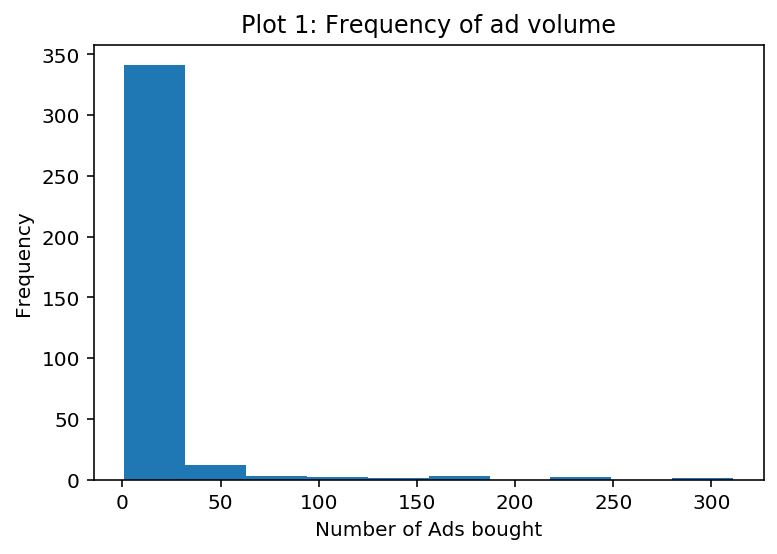

In [25]:
#gathering number of ads bought by each company
counts = pd.DataFrame(joined_data['OrganizationName'].value_counts())
#plotting a histogram of number of ads bought
ax = counts.plot(kind='hist', title='Plot 1: Frequency of ad volume', legend=False, bins=10)
ax.set_xlabel('Number of Ads bought')

### <span style="color:Red">**Plot #2**</span>

Text(0, 0.5, 'Number of ads bought')

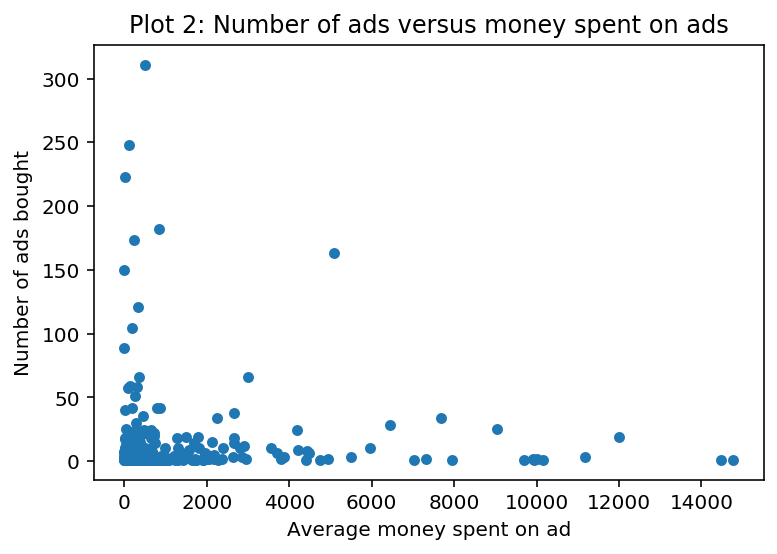

In [32]:
#selects organization names and how much spent per ad for simplicity
organization_money = joined_data[['OrganizationName', 'Spend']]
#found average money spent on each ad by each organization
mean_money_spent = organization_money.groupby('OrganizationName').mean()
#merged the average money spent with the number of ads spent found above
money_vs_numads = mean_money_spent.merge(counts, on=mean_money_spent.index)
#removed outliers greater than 15000 spent on average
money_vs_numads = money_vs_numads.loc[money_vs_numads['Spend'] <15000]
money_vs_numads = money_vs_numads.reset_index(drop=True)


numadsplot = money_vs_numads.plot(kind='scatter', x='Spend', y='OrganizationName', title='Plot 2: Number of ads versus money spent on ads')
numadsplot.set_xlabel('Average money spent on ad')
numadsplot.set_ylabel('Number of ads bought')

### <span style="color:Red">**Plot #3**</span>

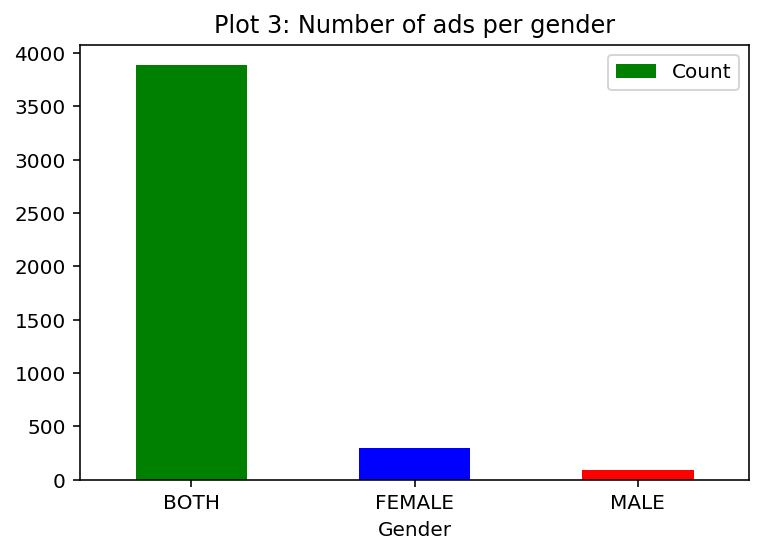

In [41]:
# fill all NaNs with 'BOTH'
joined_data['Gender'] = joined_data['Gender'].fillna('BOTH')

# get count of ADs for each gender
gender_series = joined_data.groupby('Gender').size()

# making gender bar graph
gender_lst = gender_series.index.tolist()
count_lst = gender_series.values.tolist()
gender_df = pd.DataFrame({'Gender': gender_lst, 'Count': count_lst})
gender_graph = gender_df.plot(kind = 'bar', x='Gender', y='Count', rot=0, color = ['g', 'b', 'r'], title='Plot 3: Number of ads per gender')

### <span style="color:Red">**Plot #4**</span>

In [4]:
def clean_ages(age):
    if age[-1] == '-':
        new_age = age[:-1] + '+'
        return new_age
    elif age[-1] == '+':
        if age[-2] == '+':
            new_age = age[:-1]  
            return new_age
        else:
            return age
    else:
        return age

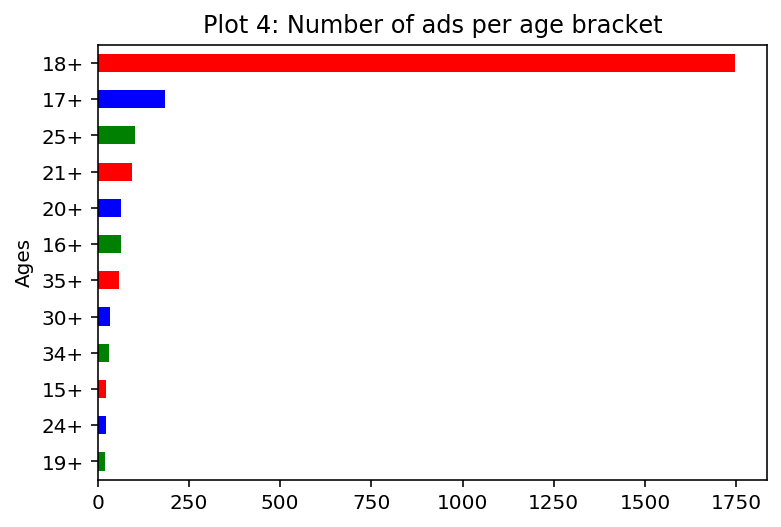

In [43]:
# fill all NaNs with 'All Ages'
joined_data['AgeBracket'] = joined_data['AgeBracket'].fillna('All Ages')

# Clean 'AgeBracket' column
joined_data['AgeBracket'] = joined_data['AgeBracket'].apply(clean_ages)

# get count of ADs for each age bracket
age = joined_data['AgeBracket']
only_ageplus = joined_data[age.str.contains('+', regex = False)]
age_series = only_ageplus.groupby('AgeBracket').size().sort_values(ascending=True)

# making age bar graph
age_lst = age_series.index.tolist()[7:] # keep only those with 20+, make graph more readable
size_lst = age_series.values.tolist()[7:] # keep only those with 20+, make graph more readable
age_df = pd.DataFrame({'Ages': age_lst, 'Count': size_lst})
age_graph = age_df.plot(kind = 'barh', x='Ages', y='Count', color = ['g', 'b', 'r'], legend = False, title='Plot 4: Number of ads per age bracket')

### <span style="color:Red">**Plot #5**</span>

In [6]:
# helper function to convert all currencies to USD
def helper(row):
    if row['Currency Code'] == 'AUD':
        return row['Spend'] * .65
    if row['Currency Code'] == 'CAD':
        return row['Spend'] * .71
    if row['Currency Code'] == 'EUR':
        return row['Spend'] * 1.08
    if row['Currency Code'] == 'GBP':
        return row['Spend'] * 1.23
    return row['Spend']

In [7]:
# apply helper on 'Spend' column
joined_data['Spend'] = joined_data.apply(helper, axis = 1)

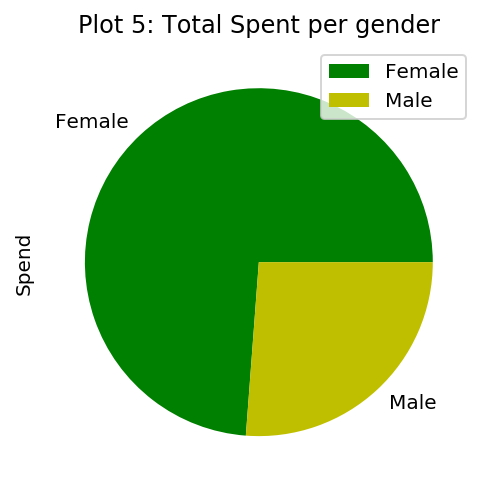

In [44]:
# # making spend/gender bar graph
spend_gender = joined_data[['Spend', 'Gender']]
f_m = spend_gender.loc[(spend_gender['Gender'] == 'FEMALE') | (spend_gender['Gender'] == 'MALE')]
grouped_gender = f_m.groupby('Gender').sum().reset_index()
grouped_gender.plot(kind = 'pie', y = 'Spend', labels=['Female', 'Male'], colors=['g', 'y'], title='Plot 5: Total Spent per gender')

### <span style="color:Red">**Plot #6**</span>

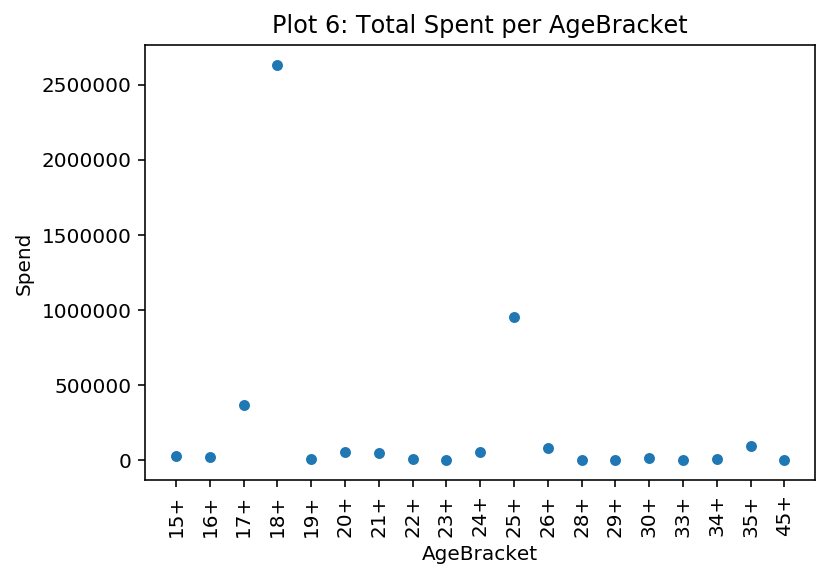

In [51]:
# grouping by 'AgeBracket' and summing the 'Spend'
age_spend = joined_data[age.str.contains('+', regex = False)].groupby('AgeBracket').sum()['Spend'].reset_index()

# plotting 'AgeBracket' vs 'Spend'
age_spend.plot(kind = 'scatter', x = 'AgeBracket', y = 'Spend', rot= 90, title='Plot 6: Total Spent per AgeBracket')

### Assessment of Missingness

<span style="color:Red">**"Is the Candidate Ballot Information missing at random dependent on the amount of spend?"**</span>

In [10]:
# obtaining the observed value
obs = joined_data.assign(is_null=joined_data['CandidateBallotInformation'].isnull()).groupby('is_null')['Spend'].mean().diff().abs().iloc[-1]

# permutation test
means = []
for i in range(10000):
    # shuffle 'Spend' column
    shuffled_col = (
        joined_data['Spend']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # assign shuffled 'Spend' column and 'CandidateBallotInformation' nulls 
    shuffled = (
        joined_data
        .assign(**{
            'spend_shuffled': shuffled_col,
            'is_null': joined_data['CandidateBallotInformation'].isnull()
        })
    )
    
    # calculate difference of means
    mean = shuffled.groupby('is_null')['spend_shuffled'].mean().diff().abs().iloc[-1]
    means.append(mean)
    
# calculate p-value, compare to observed
means= pd.Series(means)
pval = np.mean(means > obs)
pval

0.2676

<span style="color:Red">**"Are the Regions (Included) missing at random dependent on the amount of spend?"**</span>

In [11]:
# obtaining the observed value
obs = joined_data.assign(is_null=joined_data['Regions (Included)'].isnull()).groupby('is_null')['Spend'].mean().diff().abs().iloc[-1]

# permutation test
means = []
for i in range(10000):
    # shuffle 'Spend' column
    shuffled_col = (
        joined_data['Spend']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    # assign shuffled 'Spend' column and 'Regions (Included)' nulls 
    shuffled = (
        joined_data
        .assign(**{
            'spend_shuffled': shuffled_col,
            'is_null': joined_data['Regions (Included)'].isnull()
        })
    )
    
    # calculate difference of means
    mean = shuffled.groupby('is_null')['spend_shuffled'].mean().diff().abs().iloc[-1]
    means.append(mean)
    
# calculate p-value, compare to observed
means= pd.Series(means)
pval = np.mean(means > obs)
pval

0.0277

### Hypothesis Test

<span style="color:Red">**(First Permutation Test)**</span>

pval is 0.6496


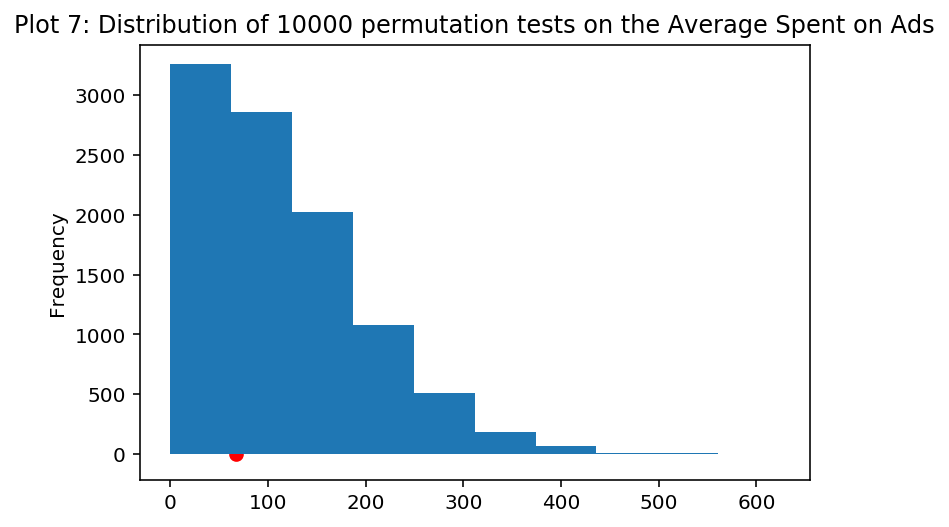

In [46]:
# renamed columns for simplicity
money_vs_numads = money_vs_numads.rename(columns = {'key_0' : 'Organization Name', 'Spend': 'Avg Spent', 'OrganizationName': 'Number of ads bought'})


# set x to be the average number of ads bought
x = money_vs_numads['Number of ads bought'].mean()

# using total variation distance as our test statistic
def tvd(num1, num2):
    return np.abs(num1-num2)/2

# getting the observed average amount of money spent on ads for companies that bought less than and greater than x ads
obs_above = money_vs_numads.loc[money_vs_numads['Number of ads bought'] < x]['Avg Spent'].mean()
obs_below = money_vs_numads.loc[money_vs_numads['Number of ads bought'] > x]['Avg Spent'].mean()
obs = tvd(obs_above, obs_below)

# do 1000 permutation tests
repetitions = 10000
differences = []
for i in range(repetitions):
    # shuffling the average money spent to assess the null hypothesis
    shuffled_spent = money_vs_numads['Avg Spent'].sample(replace = False, frac=1).reset_index(drop=True)
    shuffled = money_vs_numads.assign(**{'Shuffled Avg Spent': shuffled_spent})


    under_x = shuffled.loc[shuffled['Number of ads bought'] < x]
    above_x = shuffled.loc[shuffled['Number of ads bought'] > x]
    under_x_avg = under_x['Shuffled Avg Spent'].mean()
    above_x_avg = above_x['Shuffled Avg Spent'].mean()
    # getting test statistic using this permutation's averages
    differences.append(tvd(under_x_avg, above_x_avg))

# calculating p value and displaying charts
pval = np.mean(differences >= obs)
pd.Series(differences).plot(kind='hist', title='Plot 7: Distribution of 10000 permutation tests on the Average Spent on Ads')
plt.scatter(obs, 0, color='r', s=40);
print('pval is', pval)

<span style="color:Red">**(Second Permutation Test)**</span>

In [47]:
# add column to check whether or not ad is for both genders or just one
joined_data['Both_Genders'] = joined_data['Gender'] == 'BOTH'
perm_df = joined_data[['Spend', 'Both_Genders']]

group_means = (
        perm_df
        .groupby('Both_Genders')
        .mean()
        .loc[:, 'Spend']
    )
observed_val = group_means.diff().iloc[-1]
    
gender_differences = []
for i in range(10000):
    
    # shuffle the Spend column
    shuffled_spend = (
        perm_df['Spend']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        perm_df
        .assign(**{'Shuffled Spend': shuffled_spend})
    )
    
    # compute the two group differences
    group_means = (
        shuffled
        .groupby('Both_Genders')
        .mean()
        .loc[:, 'Shuffled Spend']
    )
    gender_difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    gender_differences.append(gender_difference)

pval is 0.0008


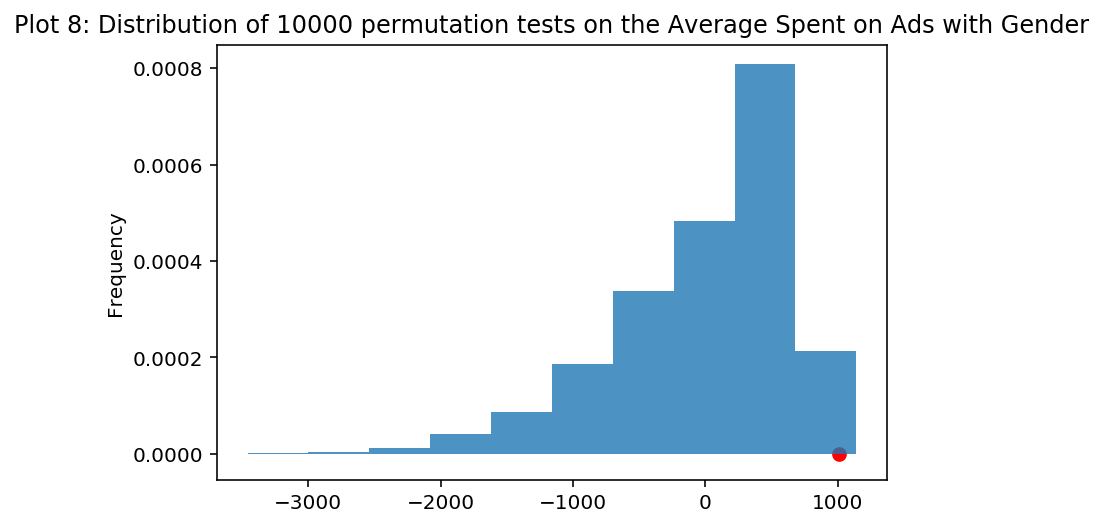

In [50]:
pd.Series(gender_differences).plot(kind='hist', density=True, alpha=0.8, title='Plot 8: Distribution of 10000 permutation tests on the Average Spent on Ads with Gender')
plt.scatter(observed_val, 0, color='red', s=40);
p_val = np.count_nonzero(gender_differences >= observed_val) / 10000
print('pval is', p_val)